## Pirâmide gaussiana de imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def downsample(img):
    '''Gera uma nova imagem com metade do tamanho da imagem de entrada. A imagem de
       entrada é suavizada utilizando um filtro gaussiano e amostrada a cada 2 pixels'''
    # Filtro gaussiano
    filtro = np.array([[1,  4,  6,  4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1,  4,  6,  4, 1]])
    filtro = filtro/256.
    
    img = img.astype(float)
    num_rows, num_cols = img.shape
    half_num_rows = (num_rows+1)//2
    half_num_cols = (num_cols+1)//2
    
    img_smooth = convolve(img, filtro, mode='same')
    img_down = np.zeros([half_num_rows,half_num_cols])
    for row in range(0, half_num_rows):
        for col in range(half_num_cols):
            img_down[row, col] = img_smooth[2*row, 2*col]
            
    return img_down

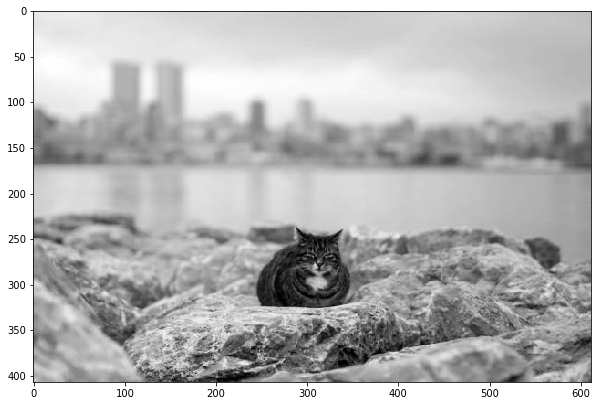

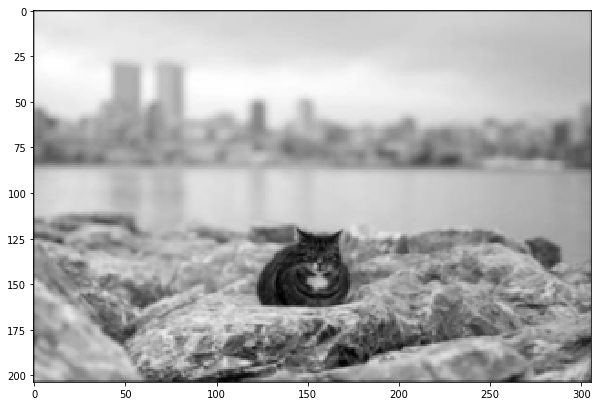

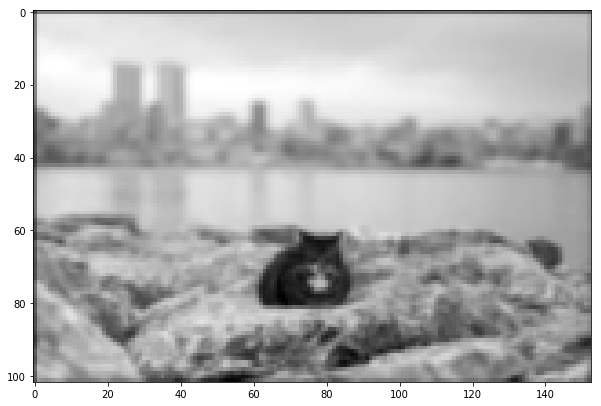

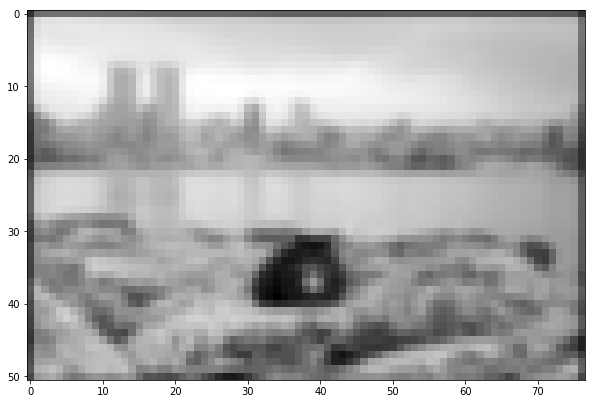

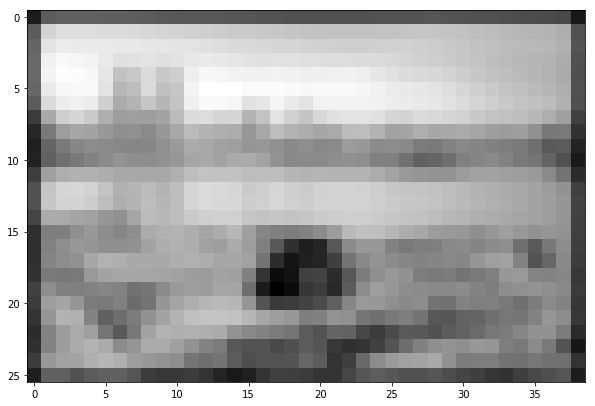

In [2]:
img = plt.imread('imagem_global.tiff')

img_2x = downsample(img)
img_4x = downsample(img_2x)
img_8x = downsample(img_4x)
img_16x = downsample(img_8x)

plt.figure(figsize=[10, 10])
plt.imshow(img, 'gray')
plt.figure(figsize=[10, 10])
plt.imshow(img_2x, 'gray')
plt.figure(figsize=[10, 10])
plt.imshow(img_4x, 'gray')
plt.figure(figsize=[10, 10])
plt.imshow(img_8x, 'gray')
plt.figure(figsize=[10, 10])
plt.imshow(img_16x, 'gray')

Note que a biblioteca matplotlib mostra as imagens com o tamanho requisitado. Para isso, a imagem é interpolada no momento da visualização.

Note também que a imagem fica mais escura próximo às bordas. Poderíamos evitar efeitos de borda utilizando métodos de preenchimento de borda mais robustos. Por exemplo, refletir os valores próximos à borda.

#### Mostra imagens utilizando um tamanho compatível com a resolução delas

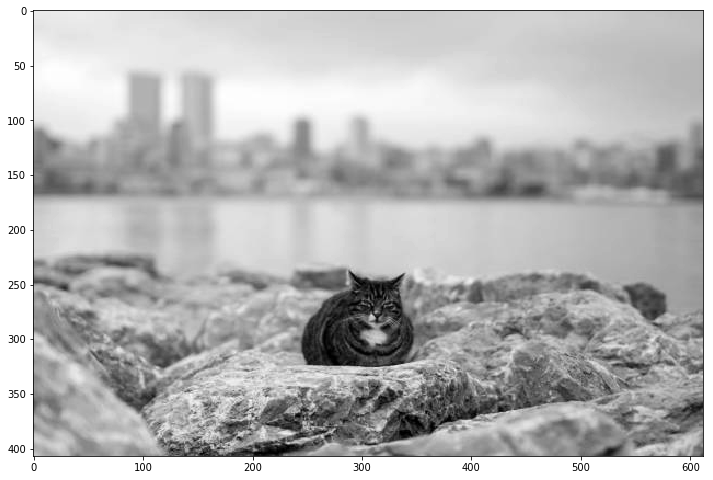

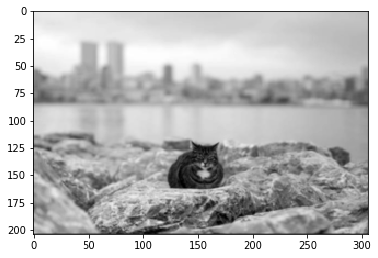

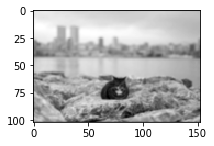

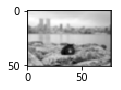

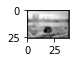

In [3]:
plt.figure(figsize=[12, 12])
plt.imshow(img, 'gray')
plt.figure(figsize=[6, 6])
plt.imshow(img_2x, 'gray')
plt.figure(figsize=[3, 3])
plt.imshow(img_4x, 'gray')
plt.figure(figsize=[1.5, 1.5])
plt.imshow(img_8x, 'gray')
plt.figure(figsize=[0.75, 0.75])
plt.imshow(img_16x, 'gray')

#### Detalhe, podemos armazenar todos os níveis da pirâmide numa lista

In [4]:
img = plt.imread('imagem_global.tiff')
num_niveis = 5

piramide = [img]
img_down = downsample(img)
piramide.append(img_down)
for i in range(num_niveis-2):
    img_down = downsample(img_down)
    piramide.append(img_down)

#### Pirâmides utilizando a biblioteca opencv

In [5]:
import cv2

img_2x_cv = cv2.pyrDown(img)
img_4x_cv = cv2.pyrDown(img_2x_cv)
